In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
from matplotlib import font_manager, rc
import matplotlib as mpl

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] == 'MS Gothic'

False

### 아주 쉬운 예시

In [79]:
# 수학 점수(Math_score)

data = [["철수",52], ["영희",92], ["미영",84], ["시완",71], ["미경",65],
        ["영환",81], ["숙경",66], ["부영",77], ["민섭",73], ["보연",74]]

# print(data)

df = pd.DataFrame(data, columns = ['이름','수학점수'])
print(df)

print(np.mean(df['수학점수']))

   이름  수학점수
0  철수    52
1  영희    92
2  미영    84
3  시완    71
4  미경    65
5  영환    81
6  숙경    66
7  부영    77
8  민섭    73
9  보연    74
73.5


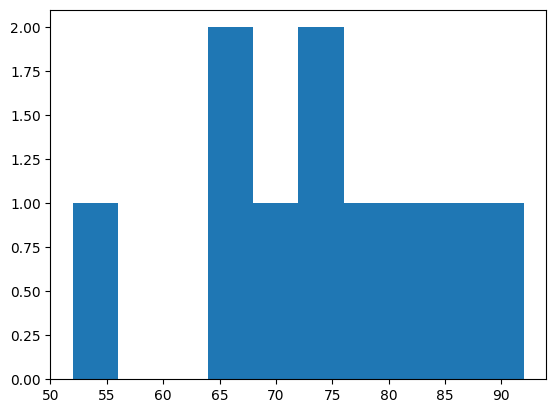

In [80]:
plt.hist(df['수학점수'])
plt.show()

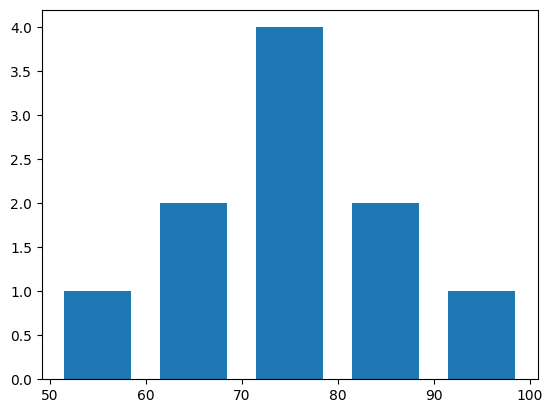

In [81]:
# 히스토그램 (범위 50 ~ 100, 5개 구간)
plt.hist(df['수학점수'], bins=5, range=[50,100], rwidth=0.7)
# rwidth(그래프 폭 조절하는 기능, 생략시 default = 1)
plt.show()

In [82]:
df.head()

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65


In [83]:
df.loc[df['수학점수'] < 60 , '등급']  = 'F'
df.loc[(df['수학점수'] >= 60) & (df['수학점수'] < 70 ),'등급']  = 'D'
df.loc[(df['수학점수'] >= 70) & (df['수학점수'] < 80 ),'등급']  = 'C'
df.loc[(df['수학점수'] >= 80) & (df['수학점수'] < 90 ),'등급']  = 'B'
df.loc[(df['수학점수'] >= 90) & (df['수학점수'] <= 100 ),'등급']  = 'A'

In [84]:
df.head()

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D


In [85]:
# CUT
df['등급_cut'] = pd.cut(x=df['수학점수'], bins=[0,60,70,80,90,100], 
                  labels = ['F','D','C','B','A'],
                  include_lowest=True)

In [86]:
df.head()

,이름,수학점수,등급,등급_cut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,B
3,시완,71,C,C
4,미경,65,D,D


In [87]:
# Qcut
df['등급_QCUT'] = pd.qcut(x=df['수학점수'],
                        q=5, 
                        labels = ['F','D','C','B','A'])

In [88]:
df.head()

,이름,수학점수,등급,등급_cut,등급_QCUT
0,철수,52,F,F,F
1,영희,92,A,A,A
2,미영,84,B,B,A
3,시완,71,C,C,D
4,미경,65,D,D,F


### 차원축소 : PCA(Principal Component Analysis, 주성분분석)

In [90]:
raw = pd.read_csv('csv_file/iris.csv')

In [91]:
iris = raw.copy()

In [94]:
# 연속형 변수와 범주형 변수 분리
df = iris.drop(['species'], axis=1)
df_species = iris[['species']]

In [95]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [98]:
df_species

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [99]:
# 변수 정규화
# 
from sklearn.preprocessing import StandardScaler

df['sepal_length'] = StandardScaler().fit_transform(df[['sepal_length']])
df['sepal_width'] = StandardScaler().fit_transform(df[['sepal_width']])

df['petal_length'] = StandardScaler().fit_transform(df[['petal_length']])
df['petal_width'] = StandardScaler().fit_transform(df[['petal_width']])

In [104]:
# PCA 수행
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)

p_score = pca.fit_transform(df)
print(p_score)
print(p_score.shape)

[[-2.26470281e+00  4.80026597e-01 -1.27706022e-01 -2.41682039e-02]
 [-2.08096115e+00 -6.74133557e-01 -2.34608854e-01 -1.03006775e-01]
 [-2.36422905e+00 -3.41908024e-01  4.42014848e-02 -2.83770534e-02]
 [-2.29938422e+00 -5.97394508e-01  9.12901063e-02  6.59555596e-02]
 [-2.38984217e+00  6.46835383e-01  1.57381957e-02  3.59228133e-02]
 [-2.07563095e+00  1.48917752e+00  2.69682944e-02 -6.60818022e-03]
 [-2.44402884e+00  4.76441976e-02  3.35470401e-01  3.67755572e-02]
 [-2.23284716e+00  2.23148073e-01 -8.86954979e-02  2.46120962e-02]
 [-2.33464048e+00 -1.11532768e+00  1.45076864e-01  2.68592208e-02]
 [-2.18432817e+00 -4.69013561e-01 -2.53765567e-01  3.98992877e-02]
 [-2.16631010e+00  1.04369065e+00 -2.68681102e-01 -1.67313672e-02]
 [-2.32613087e+00  1.33078335e-01  9.37592444e-02  1.33483413e-01]
 [-2.21845090e+00 -7.28676165e-01 -2.30911237e-01 -2.42503814e-03]
 [-2.63310070e+00 -9.61506729e-01  1.80796084e-01  1.92155336e-02]
 [-2.19874060e+00  1.86005711e+00 -4.72900998e-01 -1.94731769e

In [105]:
print(pca.explained_variance_ratio_)
# 결과해석
# 주요인 pca1, pca2
# pca1은 가장 주요한 요인으로 전체 데이터의 72.96% 설명함
# pca는 두번째 주요인으로 전체 데이터의 22.85% 설명함

# 주요인 pca1, pca2 로 설명한 데이터는 95.81%
# 0.72962445 + 0.22850762 = 0.95813207

[0.72962445 0.22850762 0.03668922 0.00517871]


In [111]:
# PCA 수행
from sklearn.decomposition import PCA

pca_2 = PCA(n_components = 2)

p_score_2 = pca_2.fit_transform(df)
print(p_score_2)
print(p_score_2.shape)
print(pca_2.explained_variance_ratio_)

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

### 결측치 처리

In [115]:
raw = pd.read_csv('csv_file/titanic.csv')
df = raw.copy()

In [117]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
# 결측치가 있는 모든 행 제거
df_row = df.dropna(axis=0)

In [121]:
df_row.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [122]:
df_row.isnull().sum().sum()

0

In [123]:
df_row.shape

(183, 12)

In [125]:
df['Age'].dtype

dtype('float64')

In [127]:
# 단순 대치 : 평균
df['Age'].isnull().sum() # Age컬럼 결측치 개수

177

In [126]:
age_mean = df['Age'].mean() # Age 평균
print(age_mean)

29.69911764705882


In [128]:
df['Age'].fillna(age_mean, inplace=True)

C:\Users\taeyoung\AppData\Local\Temp\ipykernel_31536\1439936708.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_mean, inplace=True)


In [129]:
df['Age'].isnull().sum() # 평균값 대체 후 ,age 컬럼 결측치 개수

0

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
# 단순대치법 : 최빈값 (mode) 대체

from scipy.stats import mode

df['Embarked'].isnull().sum()

2

In [134]:
embarked_mode = df['Embarked'].mode() # 최빈값이 나옴

In [135]:
embarked_mode[0]

'S'

In [138]:
# df['Embarked'].fillna(0)

In [139]:
df['Embarked'].fillna(method='ffill', inplace=True)

C:\Users\taeyoung\AppData\Local\Temp\ipykernel_31536\2170384249.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked'].fillna(method='ffill', inplace=True)


In [136]:
# df['Embarked']의 결측치를 '최빈값' 대체

# df['Embarked'].fillna(embarked_mode[0], inplace = True)
df['Embarked'].isnull().sum()

0

In [140]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
# 성별 평균 연령 구하기

df.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [145]:
# 좌석등급별 평균 연령 구하기
df.groupby('Pclass')['Age'].mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [146]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'), inplace=True)
# transform('mean') : 
#  그룹별로 계산된 값을 원래 데이터프레임의 index와 동일한 크기로 반환

In [148]:
df[['Pclass', 'Age']]

,Pclass,Age
0,3,22.000000
1,1,38.000000
2,3,26.000000
3,1,35.000000
4,3,35.000000
...,...,...
886,2,27.000000
887,1,19.000000
888,3,29.699118
889,1,26.000000


### 이상치(Outliers) 처리

In [149]:
# 정규분포
# 평균 50, 표준편차(std) : 10 인 데이터 200개 생성

data = 10 * np.random.randn(200) + 50
data[:10]

array([68.75865298, 59.28380397, 58.17580218, 59.90213723, 41.49051995,
       75.55760696, 42.18577754, 44.43128378, 51.74070423, 50.72817675])

In [151]:
df = pd.DataFrame({"값": data})

In [152]:
# 임의의 이상치 삽입
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

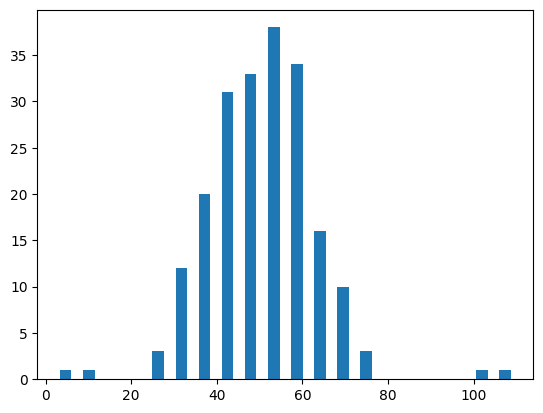

In [158]:
# 분포 시각화
plt.hist(df['값'], bins=20, rwidth=0.5)
plt.show()

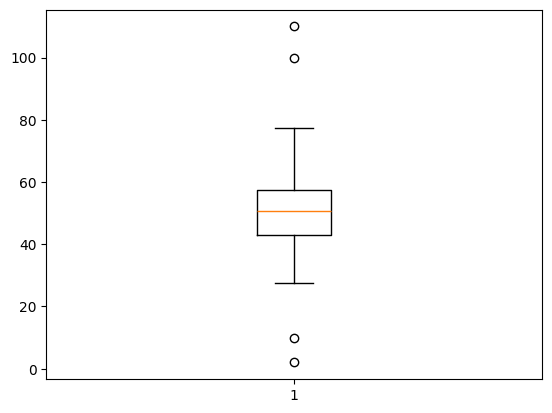

In [156]:
plt.boxplot(df['값'])
plt.show()

In [165]:
Q1 = df['값'].quantile(.25)
Q2 = df['값'].quantile(.50)
Q3 = df['값'].quantile(.75)

IQR = Q3 - Q1

print("Q1 = ", Q1)
print("Q2 = ", Q2)
print("Q3 = ", Q3)
print("IQR = ", IQR)


Q1 =  42.85262638299625
Q2 =  50.81328233530721
Q3 =  57.41978559563141
IQR =  14.567159212635161


In [166]:
Q1 = df['값'].describe()["25%"]
Q2 = df['값'].describe()["50%"]
Q3 = df['값'].describe()["75%"]

IQR = Q3 - Q1

print("Q1 = ", Q1)
print("Q2 = ", Q2)
print("Q3 = ", Q3)
print("IQR = ", IQR)

Q1 =  42.85262638299625
Q2 =  50.81328233530721
Q3 =  57.41978559563141
IQR =  14.567159212635161


In [170]:
df_desc = df.describe()
df_desc.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [176]:
df_desc.loc['25%', :]

값    42.852626
Name: 25%, dtype: float64

In [184]:
# 상한 경계 
condition = df['값'] > (Q3 + IQR * 1.5)
df[condition]
upper_outlier = df[condition]
print(upper_outlier)

         값
202  100.0
204  110.0


In [185]:
# 하한 경계
condition = df['값'] < (Q1 - IQR * 1.5)
df[condition]
upper_outlier = df[condition]
print(upper_outlier)

        값
201   2.0
203  10.0


### 평활화(Smoothing)

In [187]:
# 평활하는 데이터 분포를 매끄럽게 
# 만들어 줘서 데이터에서 중요하지 않은 것(잡음 등)을 제거 >> 패턴 분석 방법
# 이동평균(MA : Moving Average)

In [188]:
path = 'csv_file/lynx.csv'

In [191]:
raw = pd.read_csv(path)
df = raw.copy()

In [192]:
df.describe()

,Unnamed: 0,time,value
count,114.000000,114.000000,114.000000
mean,57.500000,1877.500000,1538.017544
std,33.052988,33.052988,1585.843914
min,1.000000,1821.000000,39.000000
25%,29.250000,1849.250000,348.250000
50%,57.500000,1877.500000,771.000000
75%,85.750000,1905.750000,2566.750000
max,114.000000,1934.000000,6991.000000


In [194]:
# 단순 이동 평균 (10년)
df['value'][:10]

0     269
1     321
2     585
3     871
4    1475
5    2821
6    3928
7    5943
8    4950
9    2577
Name: value, dtype: int64

In [199]:
df['value'].rolling(10).mean()[:10]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9    2374.0
Name: value, dtype: float64

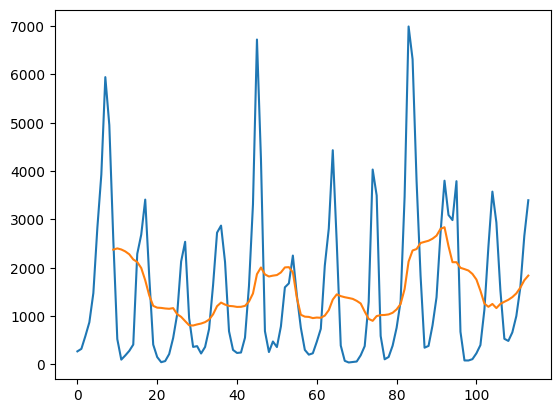

In [201]:
df['sma'] = df['value'].rolling(10).mean()

plt.plot(df['value'])
plt.plot(df['sma'])

plt.show()

In [204]:
# 지수 가중 이동평균 (10년)
df['value'].ewm(10).mean()

0       269.000000
1       296.238095
2       401.797583
3       536.360914
4       761.461483
          ...     
109    1487.443285
110    1443.129132
111    1456.481338
112    1565.621692
113    1732.022900
Name: value, Length: 114, dtype: float64

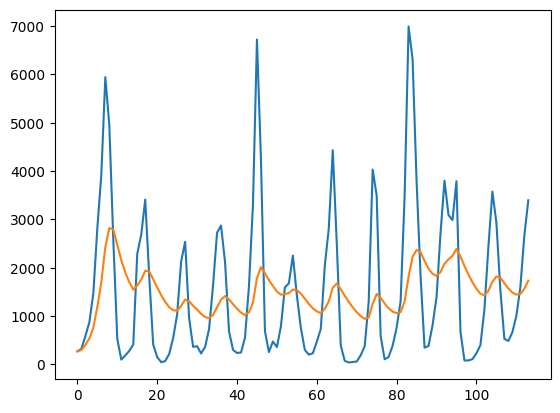

In [203]:
# ewm은 pandas 라이브러리에서 
# 지수 가중 이동 평균(Exponentially Weighted Moving Average, EWMA)을 계산할 때 사용하는 메서드
df['ewm'] = df['value'].ewm(10).mean()   #ewm 스무딩효과

plt.plot(df['value'])
plt.plot(df['ewm'])

plt.show()